In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import math

In [2]:
df=pd.read_csv("./dataset/breastcancer1.csv")

In [3]:
for i in df:
    if df[i].isna().sum()>0:
        df[i]=df[i].fillna(df[i].mean())
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
x=df[['texture_mean','radius_mean']]
y=df['diagnosis']

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: >

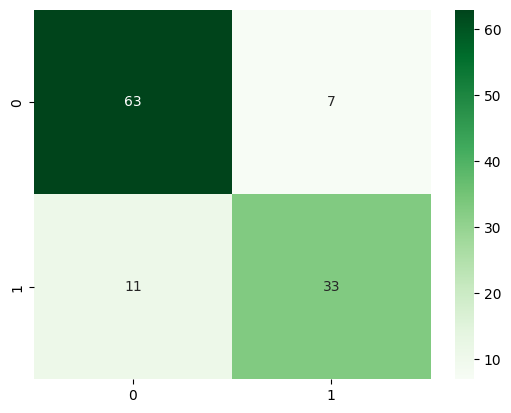

In [6]:
#correct model
knn=KNeighborsClassifier(n_neighbors=int(math.sqrt(len(df))))
knn.fit(xtrain,ytrain)
predtar=knn.predict(xtest)
confmat=confusion_matrix(ytest,predtar)
sns.heatmap(confmat,cmap="Greens",annot=True)

In [7]:

print(accuracy_score(ytest,predtar))
print(precision_score(ytest,predtar,pos_label='B'))
print(recall_score(ytest,predtar,pos_label='B'))
print(f1_score(ytest,predtar,pos_label='B'))

0.8421052631578947
0.8513513513513513
0.9
0.875


In [8]:
knn.predict([[20,20],[16.99,6.57],[16.99,23]])

/home/ma1581/learning/practiceSession/DSLab/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['M', 'B', 'M'], dtype=object)

In [9]:
graphSize=200
modelScoreList=[]
for i in range(1,graphSize): 
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    modelScore=knn.score(xtrain,ytrain)
    modelScoreList.append(modelScore)

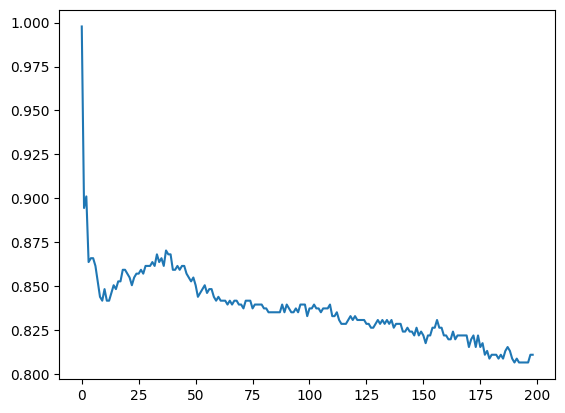

In [10]:
plt.plot(range(0,graphSize-1),modelScoreList)

<Axes: >

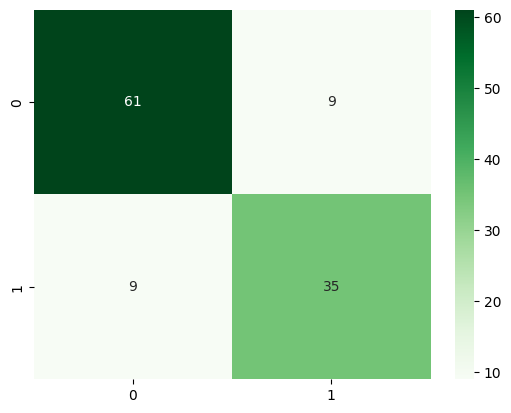

In [11]:
#optional
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
predtar=knn.predict(xtest)
confmat=confusion_matrix(ytest,predtar)
sns.heatmap(confmat,cmap="Greens",annot=True)

<Axes: >

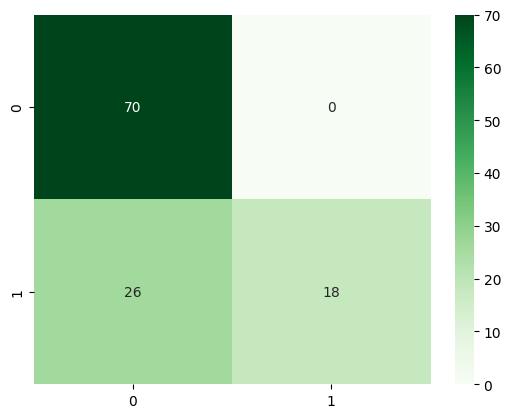

In [12]:
#optional
knn=KNeighborsClassifier(n_neighbors=int(len(df)/2))
knn.fit(xtrain,ytrain)
predtar=knn.predict(xtest)
confmat=confusion_matrix(ytest,predtar)
sns.heatmap(confmat,cmap="Greens",annot=True)